## CNN - Example 04

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

np.set_printoptions(linewidth=300)
%matplotlib inline

### Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### View data

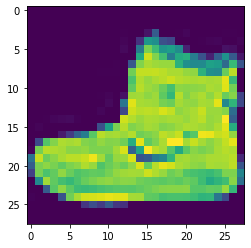

In [3]:
# x_train[0]
plt.imshow(x_train[0])

In [4]:
print(y_train[0])
print(y[y_train[0]])

9
Ankle boot


### Pre-Process data

#### Reshape

In [6]:
x_train.shape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

#### Normalize

In [7]:
# normalize and reshape the X arrays to include a 4 dimension of the single channel
x_train = x_train/255
x_test = x_test/255


#### One hot encode

In [10]:
# one-hot encode  - Note only labels y are hot encoded not the X values.
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

### Model # 1

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(28, 28, 1), 
                 activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_history = model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4130 - accuracy: 0.8532
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4055 - accuracy: 0.8573
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3990 - accuracy: 0.8590
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3917 - accuracy: 0.8599
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3874 - accuracy: 0.8620
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3822 - accuracy: 0.8638
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3776 - accuracy: 0.86500s - loss: 0.377
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3712 - accuracy: 0.8668
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3674 - accuracy: 0.8695
Epoch 10/10
1875/1875 [=========================

#### Evaluate

In [37]:
print(model.metrics_names)

['loss', 'accuracy']


##### Eval - Train

In [38]:
pd.DataFrame(model.history.history).head()

,loss,accuracy
0,0.413018,0.853233
1,0.405466,0.857333
2,0.398994,0.858967
3,0.391668,0.859900
4,0.387387,0.861983


<AxesSubplot:>

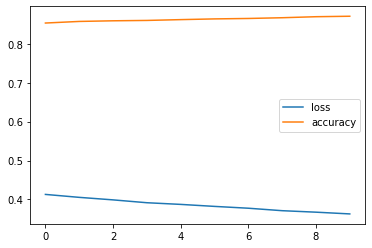

In [39]:
pd.DataFrame(model.history.history).plot()

##### Eval - Test

In [40]:
test_metrics = model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3964 - accuracy: 0.8580


In [41]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 0.39642083644866943
Accuracy on test dataset: 0.8579999804496765


In [42]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [48]:
# Note this line doesn't return after modle.evaluate is called . Don't know why? so switch to model_history
# pd.DataFrame(model.history.history).tail()
pd.DataFrame(model_history.history).tail(1)

,loss,accuracy
9,0.362929,0.870667


#### Predictions

In [49]:
y_prediction = np.argmax(model.predict(x_test), axis=-1)

#### Reports

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.74      0.76      1000
           3       0.85      0.88      0.87      1000
           4       0.79      0.70      0.74      1000
           5       0.95      0.96      0.95      1000
           6       0.61      0.66      0.63      1000
           7       0.92      0.95      0.94      1000
           8       0.95      0.96      0.96      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[830   0  12  36   4   1 102   0  15   0]
 [  3 963   2  23   2   0   5   0   2   0]
 [ 16   4 739  16  92   1 128   0   4   0]
 [ 28  12   9 883  29   0  36   0   3   0]
 [  1   1 102  39 700   1 151   0   5   0]
 [  0   0   0   2   0 959 

<AxesSubplot:>

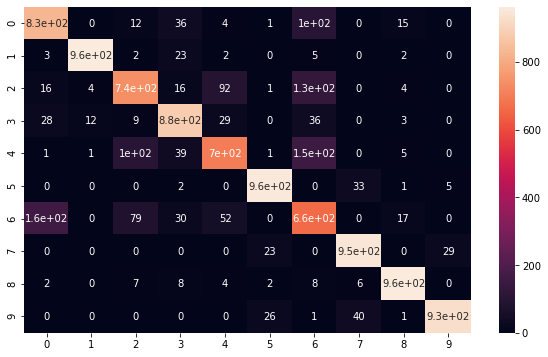

In [52]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Predictions go wrong!

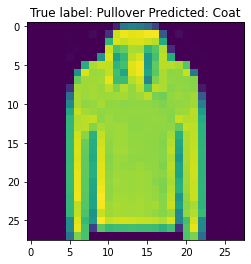

In [53]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28))
plt.title("True label: %s Predicted: %s" % (y[y_test[i]], y[y_prediction[i]]));

### Additional file(s) to test the model

### Conclusion : Final thoughts

In [29]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [54]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")

Percentage of wrong predcitions : 14.2 %


In [62]:
print("Model's maximum accuracy            : " + str(np.max(model_history.history['accuracy'])*100) + " %")
print("Model's maximum validation accuracy : " + str(test_metrics[1]*100) + " %")

Model's maximum accuracy            : 87.06666827201843 %
Model's maximum validation accuracy : 85.79999804496765 %


In [60]:
# Model has High Bias and Low Variance with 3% gap. It must improve Bias by more data, augmentation, dropout, regulation or batch-norm etc.